# Overview

In [1]:
#File Name: Figure_2BCD.ipynb
#Author: Matthias M. Fischer
#Last Revision: 20th April 2022
#Changelog: Initial Version.

#This file contains the complete commented source code
#for reproducing the plots from Figure 2B, 2C, 2D of the manuscript
#by Fischer and Blüthgen.

# Setup

In [4]:
# Library imports

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp

In [5]:
# Convenience function:
# Return the maximum real part of all
# eigenvalues of a given matrix M

def lambdamax(M):
    return np.max(np.real(np.linalg.eigvals(M)))

In [6]:
# Return the coefficient matrix A describing
# the model where all NSCC compartments
# dedifferentiate

def A(K_C=1.0,                                        # CSC cycling rate
      K_N=1.0,                                        # NSCC cycling rate
      K_T=0.05,                                       # Dedifferentiation rate
      DeltaP = 0.18,                                  # Aggregate CSC fate choice parameter, Delta P := P_S - P_D
      D_C=0.05,                                       # CSC apoptosis rate
      D_N=0.05,                                       # NSCC apoptosis rate
      M=7):                                           # Number NSCC compartments
    
    beta = DeltaP*K_C - D_C                           # CSC compartment net growth rate
    iota = (1-DeltaP)*K_C                             # Influx rate compartment N_1, in multiples of C(t)
 
    A = np.zeros((M+1, M+1))                          # Initialise coefficient matrix A
    A[0,0] = beta                                     # A_{1,1} := beta
    A[1,0] = iota                                     # A_{2,1} := iota
    
    for i in range(1, M+1):                           # A_{1,i} := K_T for i in [2...M]
        A[0,i] = K_T
    
    for i in range(1, M):                             # A_{i,i} := -K_N - K_T - D_N for i in [1,M-1]
        A[i,i] = -K_N - K_T - D_N
    
    A[M,M] = -K_T - D_N                               # A_{M+1, M+1} := -K_T - D_N
    
    for i in range(2,M+1):                            # A_{i, i-1} := 2*K_N for i in [2, M]
        A[i,i-1] = 2*K_N
        
    return A

# Figure 2B, middle panel

In [7]:
# Helper function
# Calculate the CSC apoptosis rate D_C_crit required to achieve
# negative tumour growth under standard parametrisation
# for a given dedifferentiation rate K_T

def D_C_critical(K_T):
    f = lambda D_C: lambdamax(A(K_T=K_T, D_C=D_C))
    if (f(0)<0) & (f(100)<0):
        return 0
    elif (f(0)>0) & (f(100)>0):
        return 1000
    else:
        return sp.optimize.bisect(f, 0, 100)

Text(0, 0.5, '$\\mathrm{CSC \\ Apoptosis \\ Rate \\ } D_C \\ [d^{-1}]$')

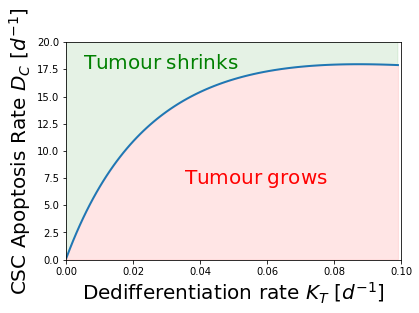

In [8]:
# Calculate D_C_crit as a function of K_T
K_T = np.arange(0, 0.1,0.001)
D_C_crit = list(map(D_C_critical, K_T))

# Plot, shade, annotate
plt.plot(K_T, D_C_crit, label="$K_T=0.01$", lw=2)
plt.fill_between(K_T, D_C_crit, 100, color="green", alpha=.1)
plt.fill_between(K_T, 0, D_C_crit, color="red", alpha=.1)
plt.text(0.005, 17.5, "$\mathrm{Tumour \; shrinks}$", color="green", fontsize=20)
plt.text(0.035, 7, "$\mathrm{Tumour \; grows}$", color="red", fontsize=20)

# Labels, limits
plt.xlim((0, 0.1))
plt.ylim((0, 20))
plt.xlabel(r"$\mathrm{Dedifferentiation \ rate \ } K_T \ [d^{-1}]$", fontsize=20)
plt.ylabel(r"$\mathrm{CSC \ Apoptosis \ Rate \ } D_C \ [d^{-1}]$", fontsize=20)


# Figure 2C, middle panel

In [9]:
# Helper function
# Calculate the CSC cell cycling rate K_C_crit required to achieve
# negative tumour growth under standard parametrisation
# for a given dedifferentiation rate K_T

def K_C_critical(K_T):
    f = lambda K_C: lambdamax(A(K_T=K_T, K_C=K_C))
    if (f(0)<0) & (f(100)<0):
        return 0
    elif (f(0)>0) & (f(100)>0):
        return 1000
    else:
        return sp.optimize.bisect(f, 0, 100)


Text(0, 0.5, '$\\mathrm{CSC \\ Cycling \\ Rate \\ } K_C \\ [d^{-1}]$')

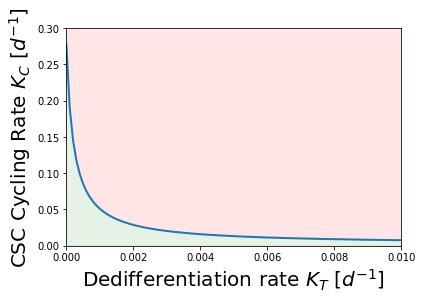

In [10]:
# Calculate K_C_crit as a function of K_T
K_T = np.arange(0, 0.1,0.0001)
K_C_crit = list(map(K_C_critical, K_T))

# Plot, shade
plt.plot(K_T, K_C_crit, label="$K_T=0.01$", lw=2)
plt.fill_between(K_T, 0, K_C_crit, color="green", alpha=.1)
plt.fill_between(K_T, K_C_crit, 100, color="red", alpha=.1)

# Labels, limits
plt.xlim((0, 0.01))
plt.ylim((0, 0.3))
plt.xlabel(r"$\mathrm{Dedifferentiation \ rate \ } K_T \ [d^{-1}]$", fontsize=20)
plt.ylabel(r"$\mathrm{CSC \ Cycling \ Rate \ } K_C \ [d^{-1}]$", fontsize=20)

# Figure 2D, middle panel

In [11]:
# Helper function
# Calculate the CSC fate parameter \Delta P_crit required to achieve
# negative tumour growth under standard parametrisation
# for a given dedifferentiation rate K_T

def DeltaP_critical(K_T):
    f = lambda DeltaP: lambdamax(A(K_T=K_T, DeltaP=DeltaP))
    if (f(-1)<0) & (f(1)<0):
        return 0
    elif (f(-1)>0) & (f(1)>0):
        return -100
    else:
        return sp.optimize.bisect(f, -1, 1)


Text(0, 0.5, '$\\mathrm{CSC \\ fate \\ } \\Delta P := P_S - P_D$')

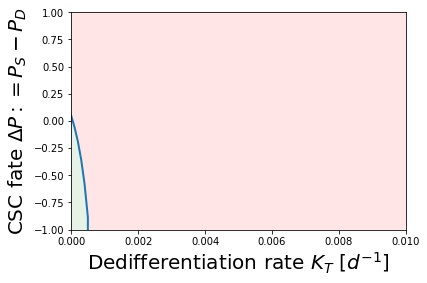

In [12]:
# Calculate K_C_crit as a function of K_T
K_T = np.arange(0, 0.1,0.0001)
DeltaP_crit = list(map(DeltaP_critical, K_T))

# Plot, shade
plt.plot(K_T, DeltaP_crit, label="$K_T=0.01$", lw=2)
plt.fill_between(K_T, -100, DeltaP_crit, color="green", alpha=.1)
plt.fill_between(K_T, DeltaP_crit, 100, color="red", alpha=.1)

# Labels, limits
plt.xlim((0, 0.01))
plt.ylim((-1, 1))
plt.xlabel(r"$\mathrm{Dedifferentiation \ rate \ } K_T \ [d^{-1}]$", fontsize=20)
plt.ylabel(r"$\mathrm{CSC \ fate \ } \Delta P := P_S - P_D$", fontsize=20)

# Figure 2B, right panel

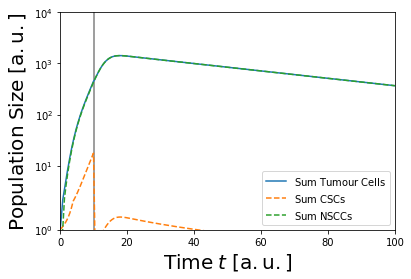

In [21]:
tmax = 100

def system(t, y, K_C=1.0, K_N=1.0, K_T=0.01, DeltaP=0.18, D_C=0.05, D_N=0.05, M=7):
    if t > 10:
        return A(K_C, K_N, K_T, DeltaP, 10, D_N, M).dot(y)
    else:
        return A(K_C, K_N, K_T, DeltaP, D_C, D_N, M).dot(y)

sol = solve_ivp(system, t_span= [0,tmax], y0=[1, 0,0,0,0,0,0,0], max_step=.1)

plt.plot(sol.t, sol.y[0]+[np.sum(x) for x in list(zip(*sol.y[1:8]))],\
             c="C0", label="$\mathrm{Sum \; Tumour \; Cells}$")
plt.plot(sol.t, sol.y[0], c="C1", label="$\mathrm{Sum \; CSCs}$", ls="--")
plt.plot(sol.t, [np.sum(x) for x in list(zip(*sol.y[1:8]))], label="$\mathrm{Sum \; NSCCs}$", c="C2", ls="--")
plt.yscale("symlog")
plt.xlabel(r"$\mathrm{Time \; } t \mathrm{\; [a.u.]}$", fontsize=20)
plt.ylabel(r"$\mathrm{Population \; Size \; [a.u.]}$", fontsize=20)
plt.legend(loc="lower right")
plt.xlim((0,tmax))
plt.ylim((1,10**4))
plt.vlines([10],0,1e6,color="grey")


# Figure 2C, right panel

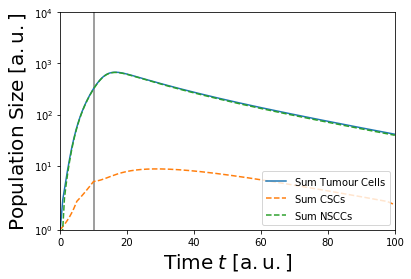

In [22]:
tmax = 100

def system(t, y, K_C=1.0, K_N=1.0, K_T=0.001, DeltaP=0.18, D_C=0.05, D_N=0.05, M=7):
    if t > 10:
        return A(0.01, K_N, K_T, DeltaP, D_C, D_N, M).dot(y)
    else:
        return A(K_C, K_N, K_T, DeltaP, D_C, D_N, M).dot(y)

sol = solve_ivp(system, t_span= [0,tmax], y0=[1, 0,0,0,0,0,0,0], max_step=.1)

plt.plot(sol.t, sol.y[0]+[np.sum(x) for x in list(zip(*sol.y[1:8]))],\
             c="C0", label="$\mathrm{Sum \; Tumour \; Cells}$")
plt.plot(sol.t, sol.y[0], c="C1", label="$\mathrm{Sum \; CSCs}$", ls="--")
plt.plot(sol.t, [np.sum(x) for x in list(zip(*sol.y[1:8]))], label="$\mathrm{Sum \; NSCCs}$", c="C2", ls="--")
plt.yscale("symlog")
plt.xlabel(r"$\mathrm{Time \; } t \mathrm{\; [a.u.]}$", fontsize=20)
plt.ylabel(r"$\mathrm{Population \; Size \; [a.u.]}$", fontsize=20)
plt.legend(loc="lower right")
plt.xlim((0,tmax))
plt.ylim((1,10**4))
plt.vlines([10],0,1e6,color="grey")


# Figure 2D, right panel

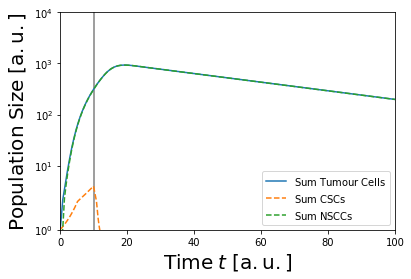

In [23]:
tmax = 100

def system(t, y, K_C=1.0, K_N=1.0, K_T=0.001/4, DeltaP=0.18, D_C=0.05, D_N=0.05, M=7):
    if t > 10:
        return A(K_C, K_N, K_T, -0.75, D_C, D_N, M).dot(y)
    else:
        return A(K_C, K_N, K_T, DeltaP, D_C, D_N, M).dot(y)

sol = solve_ivp(system, t_span= [0,tmax], y0=[1, 0,0,0,0,0,0,0], max_step=.1)

plt.plot(sol.t, sol.y[0]+[np.sum(x) for x in list(zip(*sol.y[1:8]))],\
             c="C0", label="$\mathrm{Sum \; Tumour \; Cells}$")
plt.plot(sol.t, sol.y[0], c="C1", label="$\mathrm{Sum \; CSCs}$", ls="--")
plt.plot(sol.t, [np.sum(x) for x in list(zip(*sol.y[1:8]))], label="$\mathrm{Sum \; NSCCs}$", c="C2", ls="--")
plt.yscale("symlog")
plt.xlabel(r"$\mathrm{Time \; } t \mathrm{\; [a.u.]}$", fontsize=20)
plt.ylabel(r"$\mathrm{Population \; Size \; [a.u.]}$", fontsize=20)
plt.legend(loc="lower right")
plt.xlim((0,tmax))
plt.ylim((1,10**4))
plt.vlines([10],0,1e6,color="grey")
